# Mapreader Workshop - June 7th-8th 2023

----

# Download

MapReader’s ``Download`` subpackage is used to download maps stored on as XYZ tile layers on a tile server. It contains two classes for downloading maps:

1. ``SheetDownloader`` - This can be used to download map sheets and relies on information provided in a metadata json file.

2. ``Downloader`` - This is used to download maps using polygons and can be used even if you don’t have a metadata json file.

In this workshop, we will use the ``SheetDownloader`` along with metadata stored in the ``persistant_data`` directory of the mapreader repository.

## Import the ``SheetDownloader`` and create your ``my_ts`` object.

In [1]:
from mapreader import SheetDownloader

In [2]:
download_url="https://geo.nls.uk/maps/os/1inch_2nd_ed/{z}/{x}/{y}.png"
metadata_path="../../persistent_data/metadata_OS_One_Inch_GB_WFS_light.json"

In [3]:
my_ts = SheetDownloader(metadata_path, download_url)

[INFO] Metadata file has 480 item(s).


You can view the boundaries of the map sheets included in your metadata by calling the ``.plot_all_metadata_on_map()`` method:

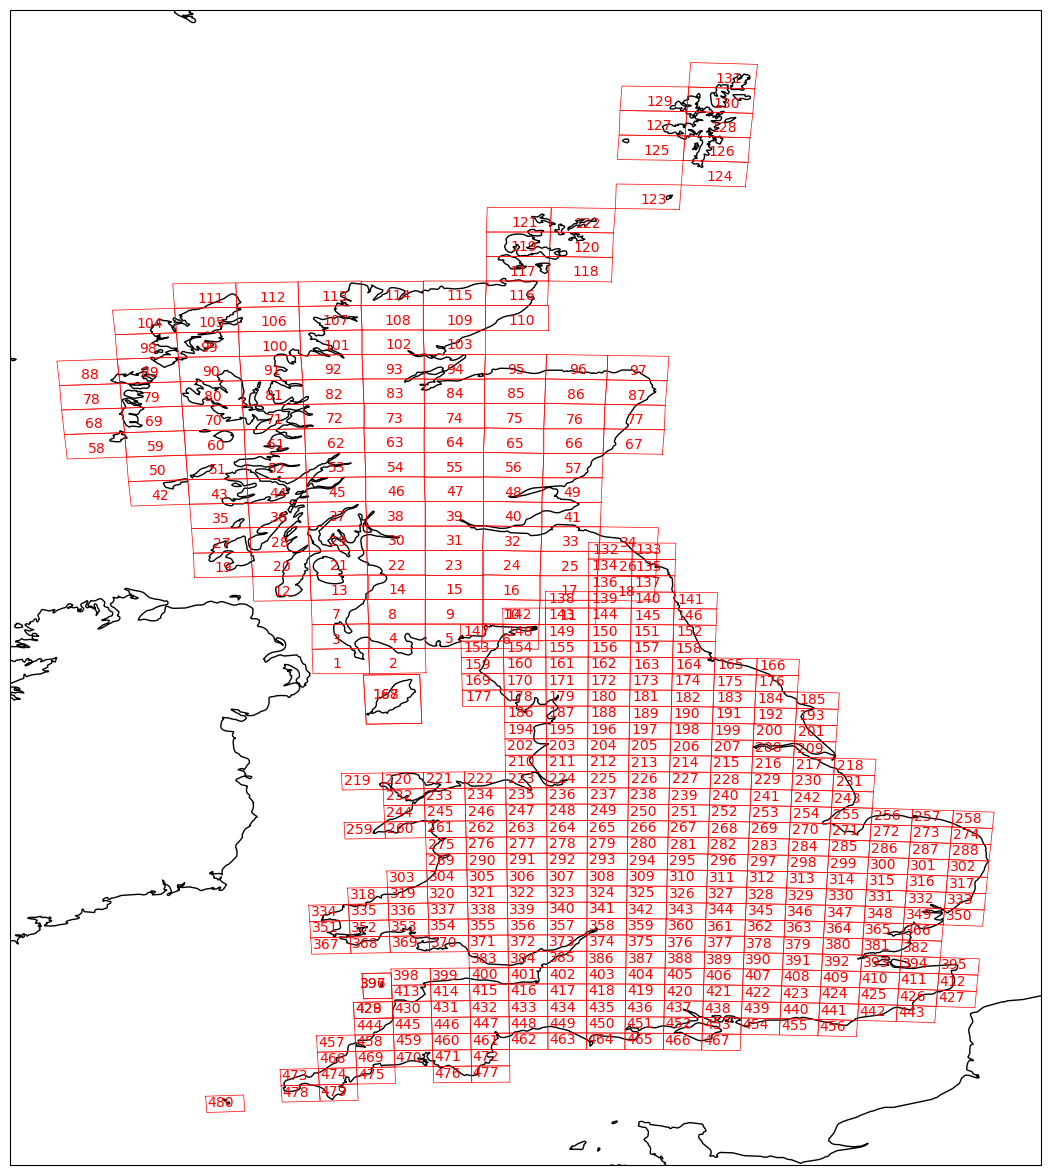

In [4]:
my_ts.plot_all_metadata_on_map()

The numbers shown are the WFS ID numbers of the maps.

## Select maps to download

Your ``SheetDownloader`` instance (``my_ts``) can be used to query and download map sheets using a number of methods:

1. Any which are within or intersect/overlap with a polygon.
2.  Any which contain a set of given coordinates.
3. Any which intersect with a line.
4. By WFS ID numbers.
5. By searching for a string within a metadata field.

These methods can be used to either directly download maps, or to create a list of queries which can interacted with and downloaded subsequently.

We will be using the querying option.

### 1. Finding map sheets which overlap or intersect with a polygon.

The ``.query_map_sheets_by_polygon()`` and ``.download_map_sheets_by_polygon()`` methods can be used find and download map sheets which are within or intersect/overlap with a [shapely.Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html#shapely.Polygon).

These methods have two modes:

- "within" - This finds map sheets whose bounds are completely within the given polygon.
- "intersects" - This finds map sheets which intersect/overlap with the given polygon.

The ``mode`` can be selected by specifying ``mode="within"`` or ``mode="intersects"``.

#### Create a polygon

In [5]:
from mapreader import create_polygon_from_latlons

In [6]:
my_polygon = create_polygon_from_latlons(55.6, -3, 56.0, -2)

#### Find maps

To find map sheets which fall **within** the bounds of this polygon:

In [7]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="within", print=True)

Query results:
URL:     	https://maps.nls.uk/view/101167571
coordinates (bounds):  	(-2.47334836, 55.69596275, -2.00970554, 55.87106161)
--------------------


Or, to find map sheets which **intersect** with this polygon:

> **_NOTE:_** This will overwrite your existing found queries unless you use the ``append=True`` argument.

In [8]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="intersects", print=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488624
coordinates (bounds):  	(-2.37999993, 55.51000003, -1.74999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488711
coordinates (bounds):  	(-2.35999993, 55.77000003, -1.72999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/101167571
coordinates (bounds):  	(-2.47334836, 55.69596275, -2.00970554, 55.87106161)
-----------

To see what you've found, plot your query results on a map using the ``.plot_queries_on_map()`` method:

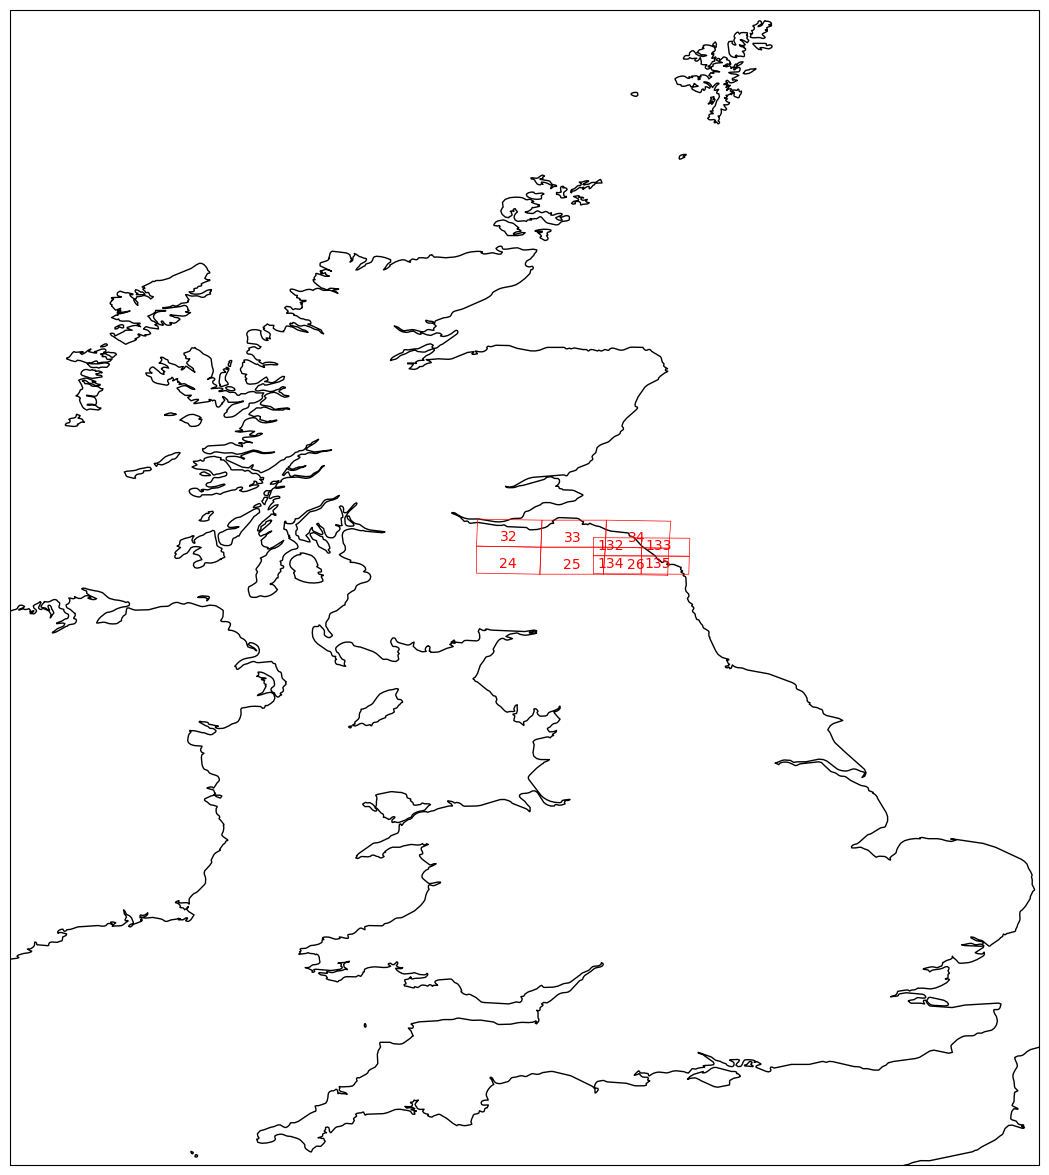

In [9]:
my_ts.plot_queries_on_map(map_extent='uk')

### 2. Finding map sheets which contain a set of coordinates.

The ``.query_map_sheets_by_coordinates()`` and ``.download_map_sheets_by_coordinates()`` methods can be used find and download map sheets which contain a set of coordinates.

In [10]:
my_ts.query_map_sheets_by_coordinates((-2.2, 53.4), print=True, append=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488624
coordinates (bounds):  	(-2.37999993, 55.51000003, -1.74999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488711
coordinates (bounds):  	(-2.35999993, 55.77000003, -1.72999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/101167571
coordinates (bounds):  	(-2.47334836, 55.69596275, -2.00970554, 55.87106161)
-----------

We've used the ``append=True`` argument and so, if you plot your found queries, you will see a new map sheet has been added to your queries list.

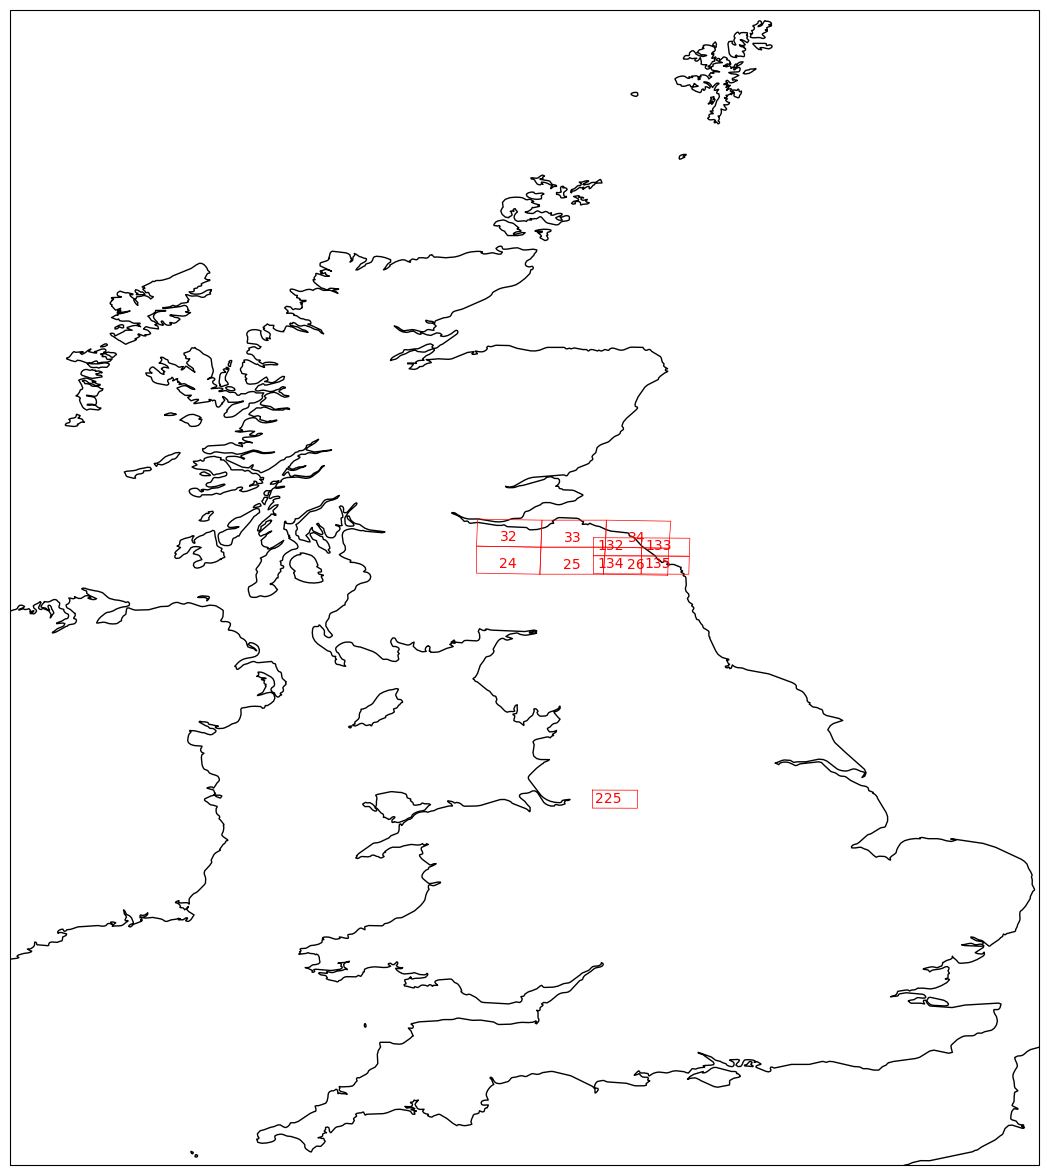

In [11]:
my_ts.plot_queries_on_map(map_extent='uk')

### 3. Finding map sheets which intersect with a line.

The ``.query_map_sheets_by_line()`` and ``.download_map_sheets_by_line()`` methods can be used find and download map sheets which intersect with a [shapely.LineString](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html#shapely.LineString).

#### Create a line

In [12]:
from mapreader import create_line_from_latlons

In [13]:
my_line = create_line_from_latlons((51.5, 0), (51.8, -1))

#### Find maps

> **_NOTE:_** In the previous examples, we used the ``print=True`` argument to print our query results each time. We've now removed this so query results aren't being printed.

In [14]:
my_ts.query_map_sheets_by_line(my_line, append=True)

Again, after plotting your queries on a map, you'll see some new map sheets have been added to your queries list.

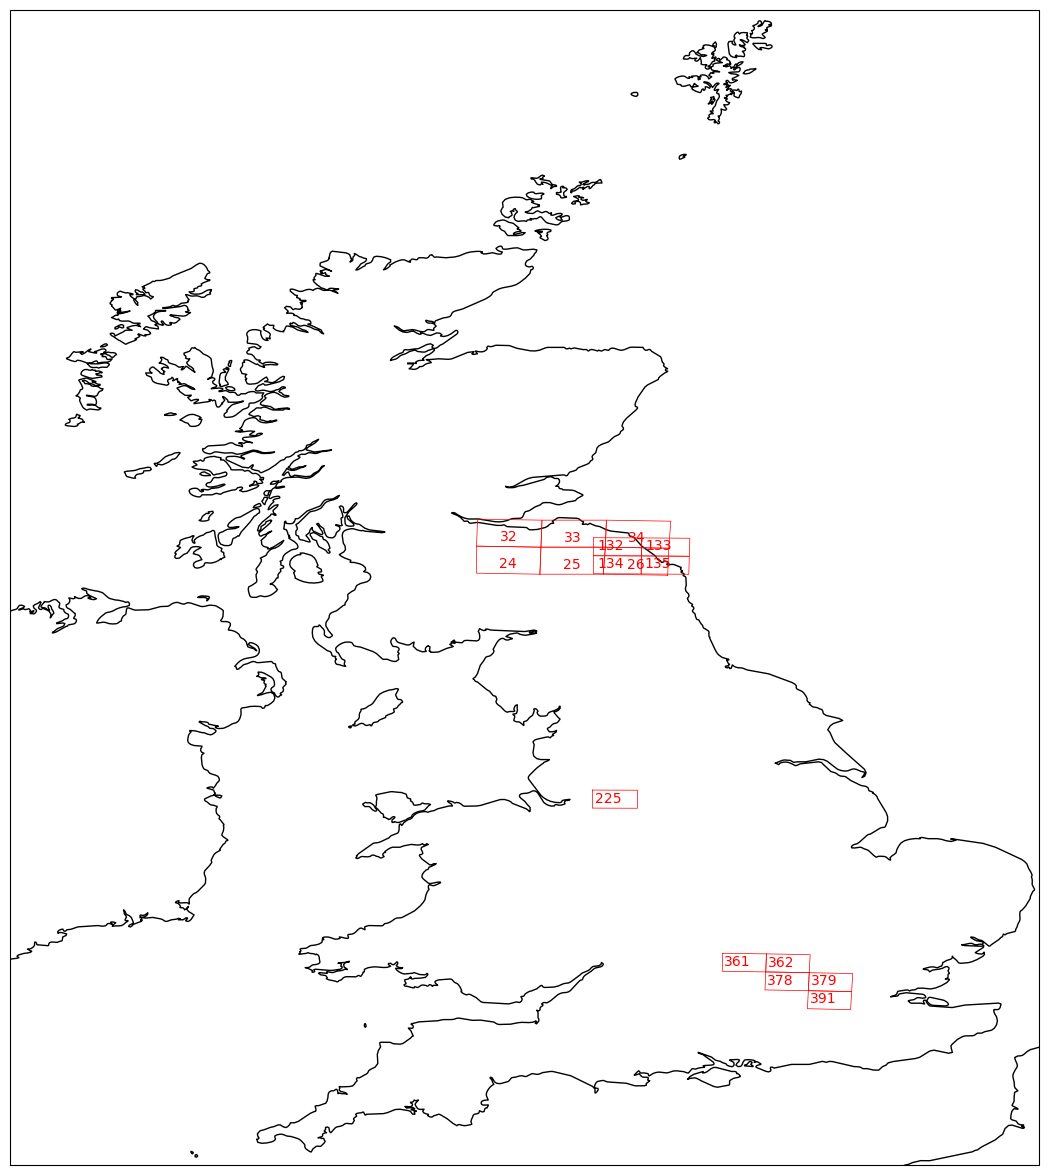

In [15]:
my_ts.plot_queries_on_map(map_extent='uk')

### 4. Finding map sheets using their WFS ID numbers.

The ``.query_map_sheets_by_wfs_ids()`` and ``.download_map_sheets_by_wfs_ids()`` methods can be used find and download map sheets using their WFS ID numbers.

These are the numbers that are being plotted on the above maps.

#### One map at a time

In [16]:
my_ts.query_map_sheets_by_wfs_ids(475, append=True)

#### Multiple maps at a time

In [17]:
my_ts.query_map_sheets_by_wfs_ids([101, 108], append=True)

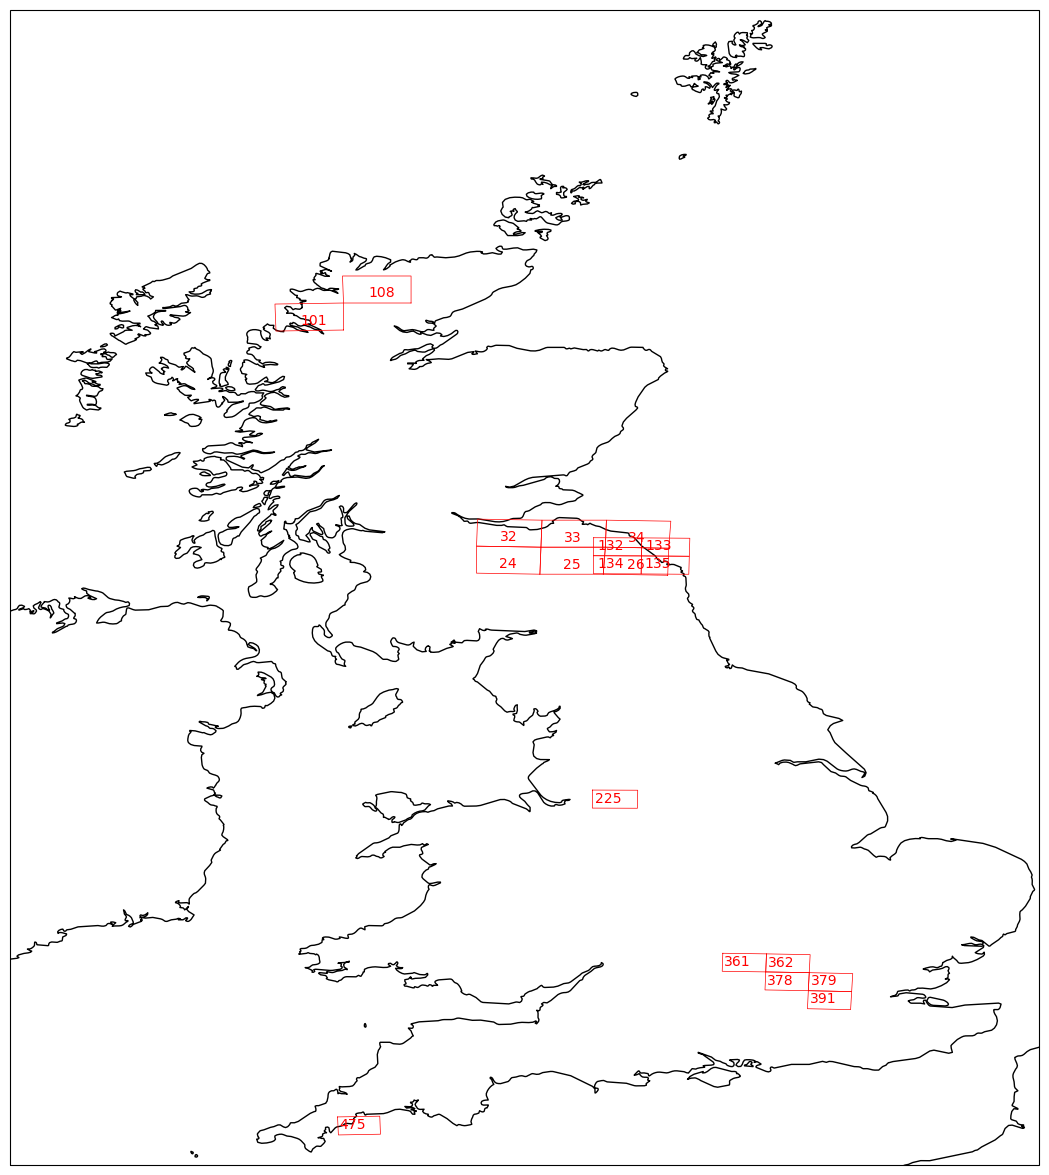

In [18]:
my_ts.plot_queries_on_map(map_extent='uk')

### 5. Finding map sheets by searching for a string in their metadata.

The ``.query_map_sheets_by_string()`` and ``.download_map_sheets_by_string()`` methods can be used find and download map sheets by searching for a string in their metadata.

These methods use [regex string searching](https://docs.python.org/3/library/re.html) to find map sheets whose metadata contains a given string. 
Wildcards and regular expressions can therefore be used in the ``string`` argument.

In [29]:
my_ts.query_map_sheets_by_string("n?don", append=True)

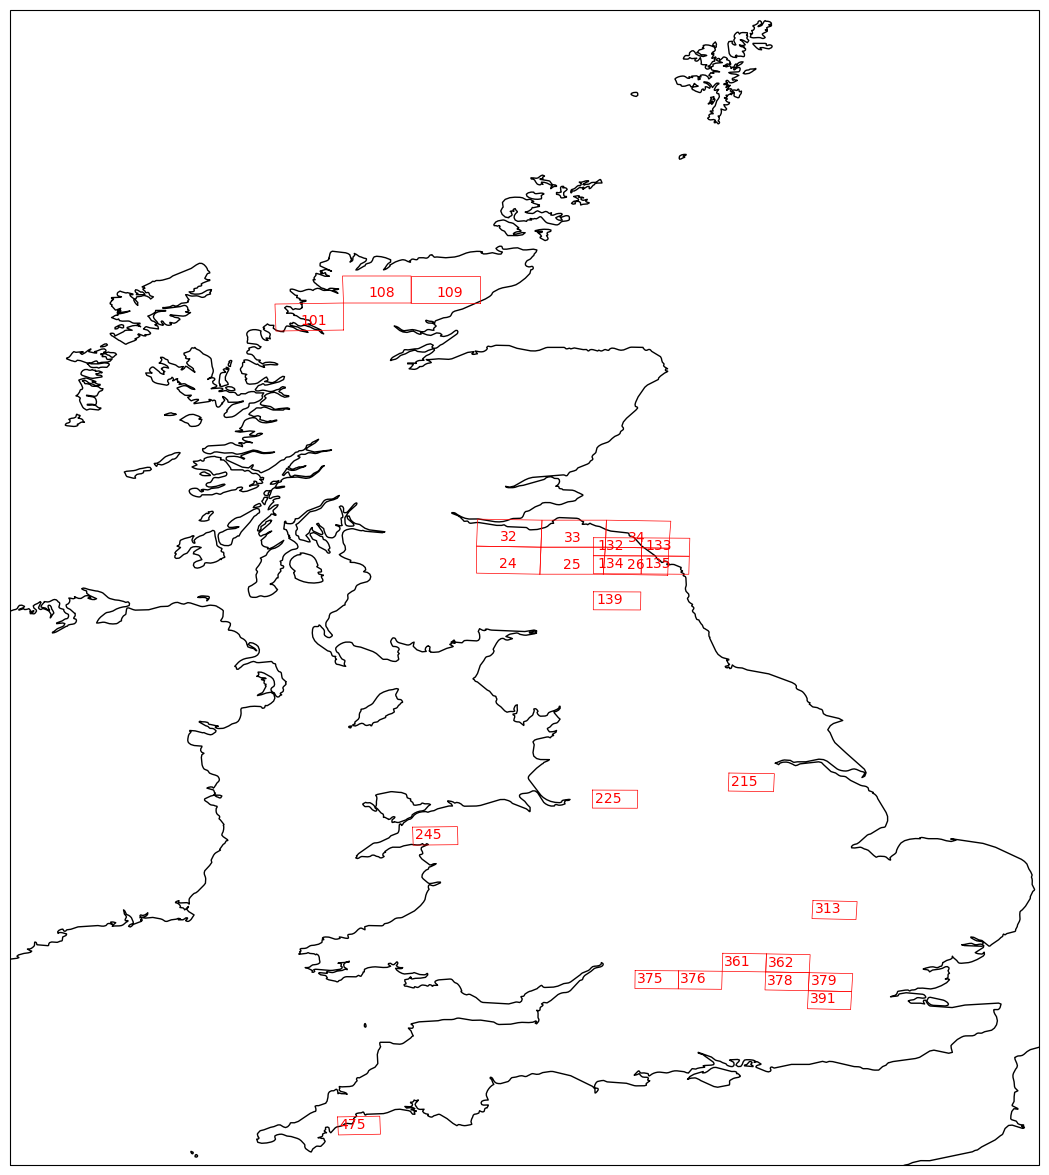

In [20]:
my_ts.plot_queries_on_map(map_extent="uk")

The above query command will search for "n?don" in **all** metadata fields.

If instead, you'd like to search a particular metadata field (e.g. "IMAGEURL"), you can specify the ``keys`` argument.

> _**NOTE**_: You will need to have an idea of the structure of your metadata in order to do this. Use ``my_ts.features[0]`` to view the metadata for the first map sheet in our metadata, if you would like to see how our metadata is structured.

In [21]:
my_ts.query_map_sheets_by_string("74487492", keys=["properties","IMAGEURL"], append=True)

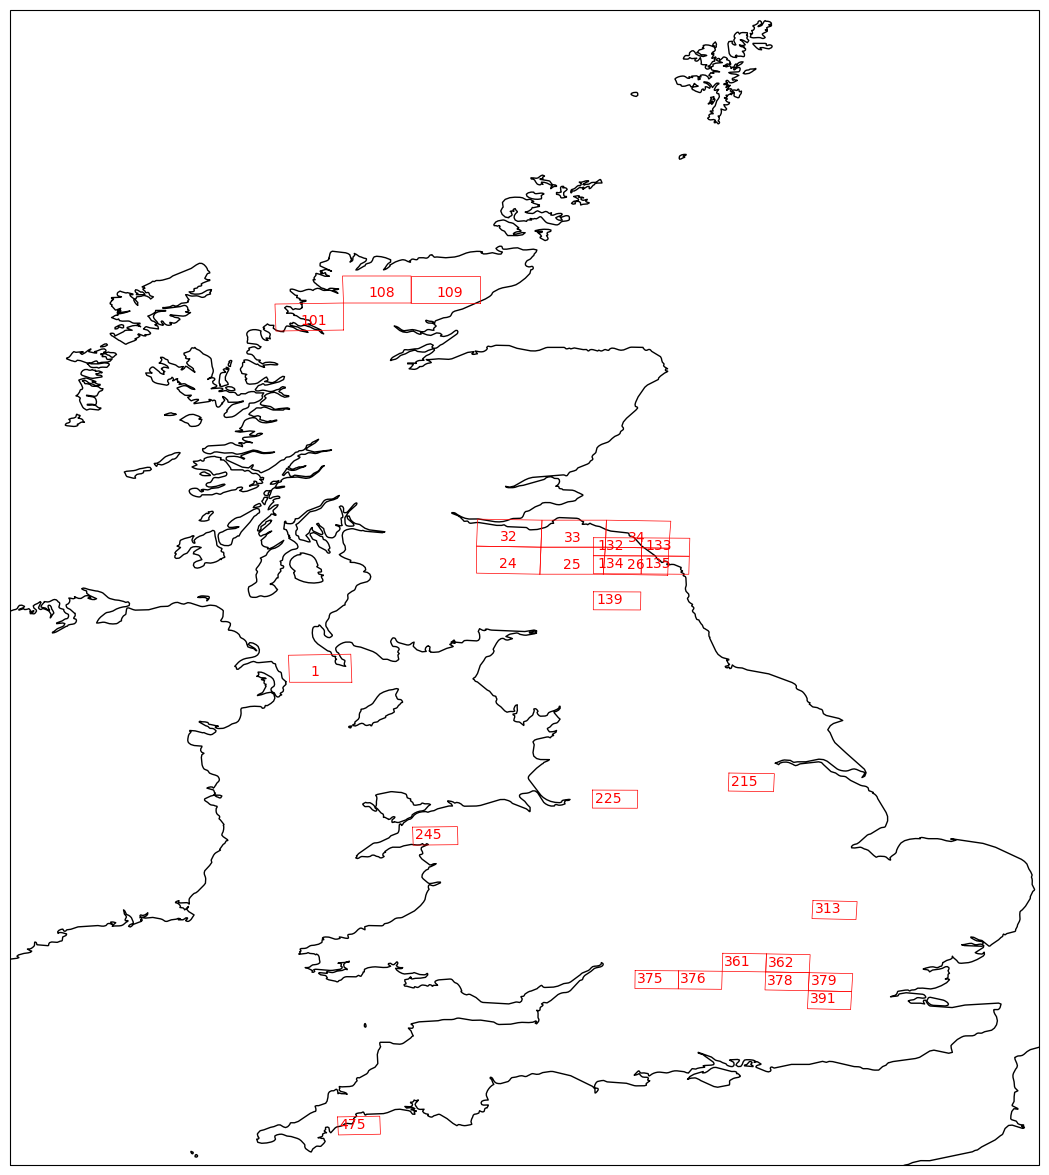

In [22]:
my_ts.plot_queries_on_map(map_extent="uk")

### Print found queries

You can print your queries list at any time using the ``.print_found_queries()`` method.

This means you can run multiple queries and check what you've found at the end.

In [23]:
my_ts.print_found_queries()

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488624
coordinates (bounds):  	(-2.37999993, 55.51000003, -1.74999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488711
coordinates (bounds):  	(-2.35999993, 55.77000003, -1.72999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/101167571
coordinates (bounds):  	(-2.47334836, 55.69596275, -2.00970554, 55.87106161)
-----------

## Download query results

To download your maps, you need to first set a zoom level using the ``.get_grid_bb()`` method.

In [26]:
my_ts.get_grid_bb(14)

Then, you can download your map sheets using ``.download_map_sheets_by_queries()``:

> _**NOTE**_: We have left ``path_save`` and ``metadata_fname`` as the default values, so maps will be saved in ``"./maps/"`` and their metadata will be saved as ``"./maps/metadata.csv"``.

In [24]:
#my_ts.download_map_sheets_by_queries()

-----

# Load

MapReader’s ``Load`` subpackage is used to load, visualise and patchify images (e.g. maps) saved locally.

## Import the ``loader`` and create your ``my_files`` object.

In [1]:
from mapreader import loader

In [2]:
my_files = loader("./maps/*png")

100%|█████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


### Add metadata

Add the ``metadata.csv`` file that was created when downloading your maps.

In [3]:
my_files.add_metadata("./maps/metadata.csv")

In [4]:
parent_df, patch_df = my_files.convert_images()
parent_df.head()

,parent_id,image_path,shape,name,url,coordinates,crs,published_date,grid_bb
map_74488556.png,None,/Users/rwood/LwM/MapReader/worked_examples/geo...,"(5376, 7168, 4)",map_74488556.png,https://maps.nls.uk/view/74488556,"(-4.81201171875, 54.76267040025495, -4.21875, ...",EPSG:4326,1897,"[(14, 7973, 5181)x(14, 8000, 5201)]"
map_74488550.png,None,/Users/rwood/LwM/MapReader/worked_examples/geo...,"(5888, 7168, 4)",map_74488550.png,https://maps.nls.uk/view/74488550,"(-4.81201171875, 54.48280455958255, -4.21875, ...",EPSG:4326,1896,"[(14, 7973, 5201)x(14, 8000, 5223)]"
map_74488553.png,None,/Users/rwood/LwM/MapReader/worked_examples/geo...,"(5632, 7424, 4)",map_74488553.png,https://maps.nls.uk/view/74488553,"(-5.42724609375, 54.74999097022691, -4.8120117...",EPSG:4326,1896,"[(14, 7945, 5181)x(14, 7973, 5202)]"


## Patchify

The ``.patchify_all()`` method is used to slice your map images into patches. 

The method used to patchify your maps is selected by specifying ``method="pixel"`` or ``method="meters"``. This determines whether your ``patch_size`` is interpreted with units of ``pixel`` or ``meters``. 

#### Patchify by pixel

> _**NOTE**_: We have used ``add_to_parents=False`` here so that these patches are not added to the ``my_files`` object. This is simply so that we don't have two sets of patches added after running both ``.patchify_all()`` commands.

In [5]:
my_files.patchify_all(method="pixel", patch_size=500, add_to_parents=False)

[INFO] Saving patches in directory named "patches_500_pixel".


100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 369.64it/s]


#### Patchify by meters

> _**NOTE**_: You will only be able to use ``method="meters"`` if you have coordinates saved for each of your map images. These can be added by running either ``.add_metadata()`` or, if your images contain georefencing information, ``.add_geo_info()``.

In [6]:
my_files.patchify_all(method="meters", patch_size=5000)

[INFO] Saving patches in directory named "patches_5000_meters".


100%|█████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


You will see your patches are saved in separate directories, each indicating the patch size and method used.

### Visualise patches

``MapReader`` also contains some useful functions for visualising your patches.

For example, the ``.show_sample()`` method can be used to show a random sample of your patches:

In [ ]:
my_files.show_sample(num_samples=3, tree_level="patch", random_seed=1)

You may also want to see all the patches created from one of your parent images. 
This can be done using the ``.show_parent()`` method:

100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.24s/it]


[<Figure size 1000x1000 with 1 Axes>]

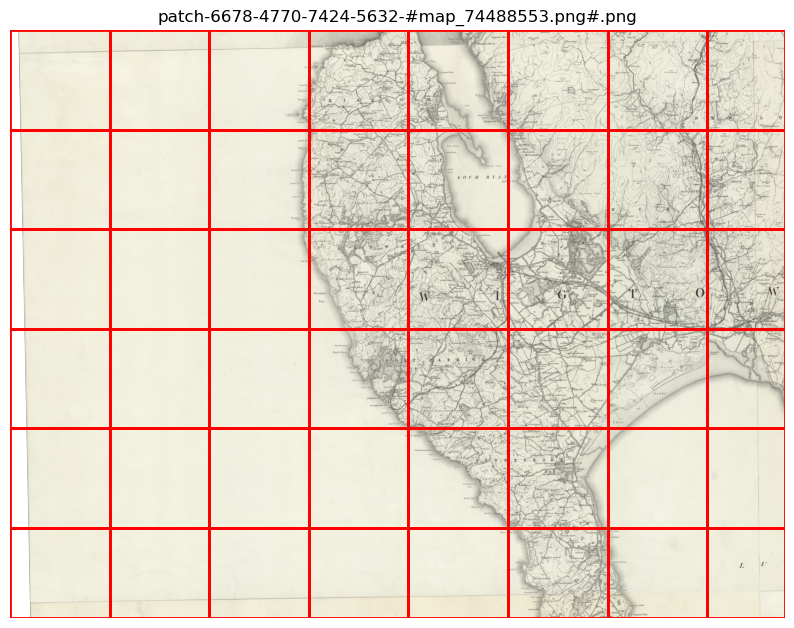

In [8]:
my_files.show_parent("map_74488553.png")

In [9]:
parent_df, patch_df = my_files.convert_images(save=True, save_format="excel")
patch_df.head()

In [ ]:
#my_files.save_patches_to_geojson()

-----

# Annotate

----

# Classify